# Un primer vistazo a una Red Neuronal

Utilizaremos la **biblioteca Python Keras** para aprender a **clasificar** dígitos manuscritos.

**PROBLEMA:**
- Clasificación de imágenes en escala de grises de números escritos a mano (28 x 28 píxeles) en sus 10 categorías (de 0 a 9)
- Usaremos 60K imágenes de entrenamiento, más de 10K imágenes de prueba todas ellas recopiladas por el National Institute of Standards an Technology (NIST de MNIST) en los años ochenta.
- Este es el "Hola Mundo" del Deep Learning
- El conjunto de datos MNIST está precargado en Keras en la forma de un conjunto de cuatro matrices Numpy
- Algunas muestras

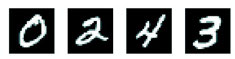

- Una "categoría" de un problema de clasificación, se denomina **clase**
- Los "puntos de datos" son **muestras**
- La clase asociado a una muestra específica se llama **etiqueta**
- Por ahora no vamos a ejecutarlo, vamos a intentar entenderlo

In [43]:
# 1._ IMPORTAMOS KERAS
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
#print(tf.keras.__version__)   # para verificar que tienes la versión correcta instalada
print("GPU Available:", tf.config.list_physical_devices('GPU'))
print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
GPU Available: []
2.12.0


**Cargamos el conjunto de datos  MNIST en Keras**

Las imágenes en el conjunto de datos MNIST son imágenes en escala de grises de dígitos escritos a mano, y las etiquetas son los números reales que representan los dígitos correspondientes (entre 0 y 9).

Se crean *dos tuplas*:

*   Una con las imagenes y etiquetas de las imagenes de entrenamiento
*   Otra igual con las imagenes de prueba

In [44]:
# 2.- CARGAMOS EL CONJUNTO DE DATOS MINIST EN KERAS
# mnist = tf.keras.datasets.mnist
from keras.datasets import mnist  # mnist = imagenes de los números entre 0 y 9

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()  # se crean dos tuplas

- `train_images` y `train_labels` son el **conjunto de entrenamiento** (los datos de los que aprenderá el modelo).
- `test_images` y `test_labels` son el conjunto de pruebas (los datos con los que testearemos el modelo ya entrenado).
- Las imágenes están **codificadas** como matrices `Numpy`, y las etiquetas son un vector de números con valores entre el 0 y el 9 (imágenes y etiquetas tienen una correspondencia 1 a 1)

Echamos un vistazo a los **datos de entrenamiento**:

El siguiente comando nos da información sobre las dimensiones de la matriz de las imagenes de entrenamiento.
Al ejecutar vemos lo siguiente:

*   Hay 60,000 imágenes en el conjunto de entrenamiento.
*   Cada imagen tiene una forma de 28x28 píxeles, lo que significa que tiene 28 filas y 28 columnas.

Cada imagen del conjunto de datos MNIST se representa como una matriz bidimensional donde cada pixel de la imgen es un valor numerico que representa la intensidad del color (escala de grises)


In [45]:
print(train_images.shape)

(60000, 28, 28)


Para mostrar la matriz de forma más legible, se hace lo siguiente:

*    Se controla la cantidad de decimales que se muestran cuando se imprimen números reales, en este caso 2 decimales (precision=2)
*    Se suprime la notación científica (suppress=True)
* Se ajusta el ancho de línea máximo a 145 caracteres (linewidth=145)

In [46]:
# Vemos la matriz de la imagen número 30.000 (28x28)
import numpy as np
np.set_printoptions(precision=2, suppress=True, linewidth=145)  # esto se escribe para que la matriz sea legible (no es importante que lo sepa; puedo copiar esta linea de codigo cuando lo necesite)
print(np.matrix(train_images[30000]))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  47 156 205 254 255 112   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  53 208 245 253 253 253 240 249  50   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   1  73 242 248 212 128  56  56 122 253  94   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 101 253 211  64   0   0   0   0  66 253 212   0   0   

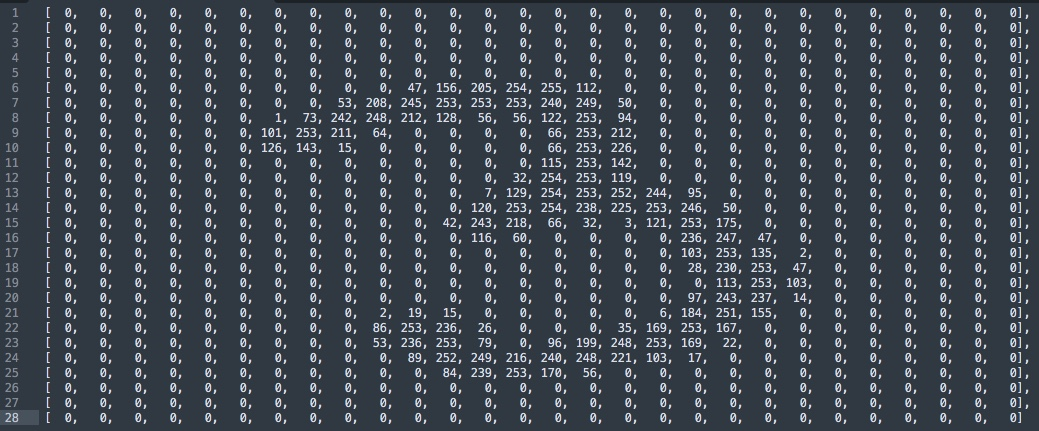

Mostramos la etiqueta de la imagen numero 30000

In [47]:
# La imagen anterior corresponde con el número 3. Hasta se puede intuir....
train_labels[30000]

3

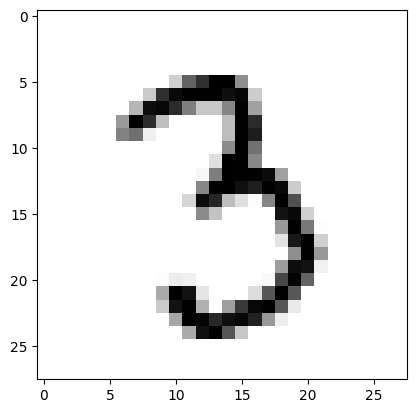

In [48]:
# Veamos el elemento 30000 y pintémoslo con matplotlib.
# Matplotlib es una biblioteca utilizada en Python para crear gráficos y visualizaciones.
import matplotlib.pyplot as plt
digit = train_images[30000]  # Esta variable ahora contiene la matriz numérica que representa la imagen numero 30000

# cmap=plt.cm.binary se utiliza para representar la imagen en blanco y negro (escala de grises),
# invierte la escala de colores predeterminada para que los píxeles oscuros aparezcan en blanco y los píxeles claros aparezcan en negro.
# Es decir, los valores más bajos en la matriz aparecerán en blanco y los valores más altos aparecerán en negro.
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

Muestra la cantidad total de etiquetas (de imagenes de entrenar) que hay.

A continuación, se muestra un array con el valor (numero entre 0 y 9) de esas etiquetas

In [49]:
len(train_labels)

60000

In [50]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

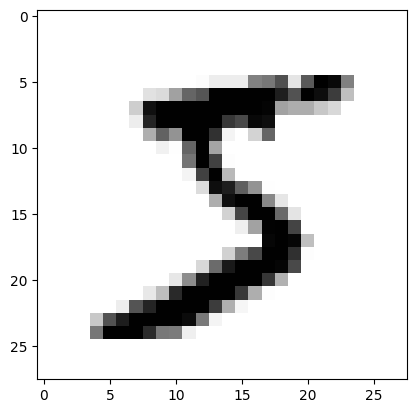

In [51]:
# Veamos el elemento 0 (que vemos que es un 5) y pintémoslo con matplotlib
import matplotlib.pyplot as plt
digit = train_images[0]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

Los **datos de prueba**:

Lo mismo que ya hemos hecho antes pero en vez de con las imagenes de entrenamiento, usamos las de prueba

In [52]:
test_images.shape

(10000, 28, 28)

In [53]:
len(test_labels)

10000

In [54]:
test_labels.shape, test_labels

((10000,), array([7, 2, 1, ..., 4, 5, 6], dtype=uint8))

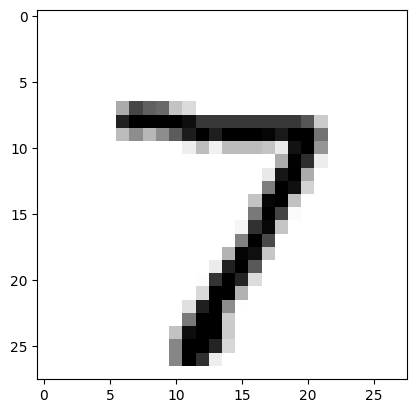

In [55]:
# Veamos el elemento 0 de test (que vemos que es un t) y pintémoslo con matplotlib
import matplotlib.pyplot as plt
digit = test_images[0]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

### Fujo de trabajo
1. Damos a la RNA los datos de entrenamiento `train_images` y `train_labels`
2. La red aprenderá a asociar imágenes y etiquetas
3. Pediremos a la RNA que haga predicciones para `test_images` y comprobaremos si estas predicciones coinciden con las etiquetas de `test_labels`

**CONSTRUIMOS LA RNA**

- **Capa** (**layers**) es el **componente básico de las redes neuronales**. => Es un **filtro** de datos (módulo de procesamiento de datos).Entran datos y salen con una forma más útil para el objetivo del problema a resolver. => **Destilación de datos**
    - Las capas extraen **representaciones**  de los datos introducidos en ellas, que deberían ser más significativas para el problema en cuestión.

In [56]:
# 3.- CONSTRUIMOS LA ARQUITECTURA DE LA RED
from keras import models   # keras me permite crear redes neuronales rapidamente
from keras import layers

# ---------------------------------------------------------------------------------------------------------------------
# El tipo de red será secuencial. Desde la entrada hasta la salida sin ciclos.

# ES DECIR, UN MODELO SECUENCIAL VA DE CAPA EN CAPA (A LA SIGUIENTE; NO VUELVE ATRAS)
# ------------------------------------------------------------------------------------

network = models.Sequential()

# ---------------------------------------------------------------------------------------------------------------------
# Creamos dos capas "Dense", que son capas neuronales densamente conectadas
# (también llamadas "completamente conectadas"). Cada una de las 512 neuronas de
# la capa de entrada están conectadas con los 784 píxeles = 28*28. Solo lo
# definimos para la primera capa. Para la segunda capa y posteriores, Keras lo
# deduce.

# UNA CAPA DENSA QUIERE DECIR QUE TODAS LAS NEURONAS DE UNA CAPA SE CONECTAN CON TODAS LA NEURONAS DE LA CAPA SIGUIENTE
# 512 SON EL NUMERO DE NEURONAS
# INPUT SHAPE SON LOS VALORES DE LOS PIXELS
# RELU  --> SI VALOR NEGATIVO, DEVUELVE UN 0. SI VALOR POSITIVO, DEVUELVE UN 1
# ---------------------------------------------------------------------------------------------------------------------

network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))

# ---------------------------------------------------------------------------------------------------------------------
# Probar 10 neuronas y 'sigmoid' <==============================================
# Capa de salida "softmax" de 10 vías (o neuronas). Significa que
# devolverá una matriz de 10 puntuaciones de probabilidad (sumando 1)
# La puntuación será la probabilidad de que la imagen del dígito actual
# pertenezca a una de nuestras clases de 10 dígitos.

# 10 REPRESENTA LAS PROBABILIDADES DE QUE EL NUMERO SEA 0,1,2...9
# LA PROBABILIDAD DE QUE SEA UN NUMERO RESIDE EN LOS PESOS
# NUMERO DE PESOS = 512 X 10 (mas alguno otro)

# SOFTMAX ES LA FUNCION DE PROBABILIDAD
# ---------------------------------------------------------------------------------------------------------------------

# network.add(layers.Dense(10, activation='softmax'))
network.add(layers.Dense(10, activation='sigmoid'))

# ---------------------------------------------------------------------------------------------------------------------
# Cada capa aplica unas cuantas operaciones con tensores sencillas a los datos
# de entrada, y que estas operaciones implican tensores de pesos. Los tensores
# de peso, que son los atributos de las capas, son donde persiste el
# "conocimiento" de la red.
# En general, la capa de salida de una red de clasificación tendrá tantas
# neuronas como clases, menos en la clasificación binaria, que con 1 vale. Cada
# valor será la probabilidad de que la imagen del dígito actual pertenezca a cada
# una de las clases
# ---------------------------------------------------------------------------------------------------------------------

network.summary()
# Total parametros entrenables = parametros capa 1 + parametros capa 2 =
# = [(tamaño datos entrada)(número de neuronas en capa 1) + sesgo de cada neurona] + [(número de neuronas en capa anterior)(número de neuronas en capa 2) + sesgo de cada neurona]
# A continuacion, se calcula el numero de parametros para 512 neuronas.
# Nombre de las capas automáticos a no ser que lo definamos
# 401.920 = 784 x 512 + 512 Sesgo
# 5.130 = 512x10 + 10 Sesgo
# 407.050 = 401.920 + 5.130

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               401920    
                                                                 
 dense_7 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


A menudo se indica la **inicialización de los pesos** como argumento de las capas `Dense`. <=====BUSCAR=====> Los valores iniciales deben ser adecuados para que el problema de optimización converja tan rápido como sea posible en el proceso de entrenamiento de la red. En el manual de Keras podéis ver diversas opciones de inicialización.

* Probar en la primera capa: 10 neuronas y función de activación **'sigmoid'**

* https://keras.io/models/sequential
* Para modelos más complejos: https://keras.io/getting-started/functional-api-guide
* https://keras.io/layers/core/#dense

La ultima línea de código utiliza la función plot_model de Keras para visualizar la arquitectura de una red neuronal llamada network.

 Los argumentos de la función son los siguientes:


*   network --> El modelo de red neuronal que deseas visualizar
*   "my_first_model.png" --> El nombre del archivo de imagen en el que se guardará la visualización de la arquitectura
*   show_shapes=True --> indica que se deben mostrar las formas (dimensiones) de las salidas de cada capa en la visualización



Por ejemplo, si ves (None, 64) en una capa, significa que la dimensión del lote es variable (puede ser cualquier número de ejemplos de entrenamiento), y 64 es el numero de neuronas. Si alimentas la red con un lote de 32 ejemplos de entrenamiento, cada neurona en esa capa tendrá una salida de tamaño 64 para cada uno de los 32 ejemplos en el lote.

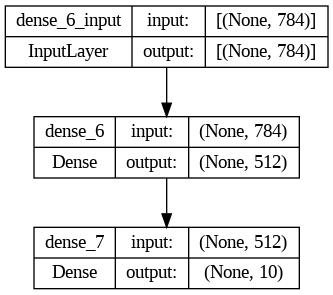

In [57]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
keras.utils.plot_model(network, "my_first_model.png", show_shapes=True)  # utils esta llena de utilidades (como por ejemplo para pasar numeros al one hot encoding)

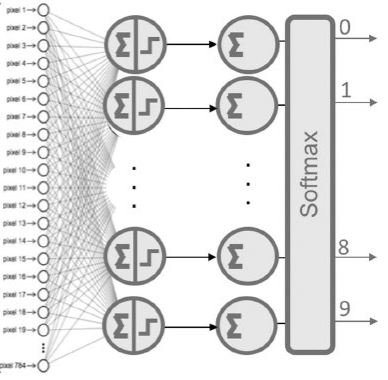

**SOFTMAX**

* La función **softmax** en la que la salida de cada neurona corresponde a la probabilidad estimada de la clase correspondiente. Dada una imagen de entrada, obtendremos las probabilidades de que sea cada uno de los 10 posibles dígitos. Esta aproximación de usar una distribución de probabilidades nos puede dar una mejor idea de cuán confiados estamos de nuestra predicción.

* Para cada ejemplo de entrada obtendremos como vector de salida de la red neuronal una distribución de probabilidad sobre un conjunto de etiquetas mutuamente excluyentes, es decir, un vector de 10 probabilidades cada una correspondiente a un dígito y que todas estas 10 probabilidades sumen 1 (las probabilidades se expresarán entre 0 y 1).

* La función softmax se basa en calcular **“las evidencias”** de que una determinada imagen pertenece a una clase en particular y luego se convierten estas evidencias en probabilidades de que pertenezca a cada una de las posibles clases

* Para medir la **evidencia** de que una determinada imagen pertenece a una clase en particular, una aproximación consiste en realizar una **suma ponderada de la evidencia de pertenencia** de **cada uno de sus píxeles** a esa clase.

* Ejemplo con el 0: 28×28 píxeles, los píxeles en rojo  representa pesos negativos (es decir, reducir la evidencia de que pertenece), mientras que los píxeles en azul representan pesos positivos (aumenta la evidencia de que pertenece). El color negro representa el valor neutro

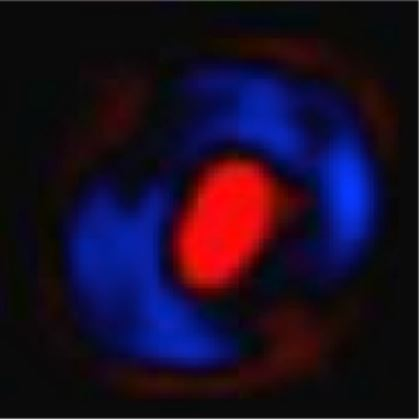

* Hoja en blanco encima sobre la que trazamos un cero. En general, el trazo de nuestro cero caería sobre la zona azul. Resulta bastante evidente que si nuestro trazo pasa por encima de la zona roja lo más probable es que no estemos escribiendo un cero; por tanto, usar una **métrica basada en sumar si pasamos por zona azul y restar si pasamos por zona roja, parece razonable**.

* Para confirmar que es una buena métrica imaginemos ahora que trazamos un tres; está claro que **la zona roja del centro** del anterior modelo que usábamos para el cero **va a penalizar la métrica **antes mencionada puesto que como podemos ver en la parte izquierda de esta figura al escribir un tres pasamos por encima.

* Pero en cambio, si el modelo de referencia es el correspondiente al 3 como el mostrado en la parte derecha de la figura, podemos observar que, en general, los diferentes posibles trazos que representan un tres se mantienen mayormente en la zona azul.

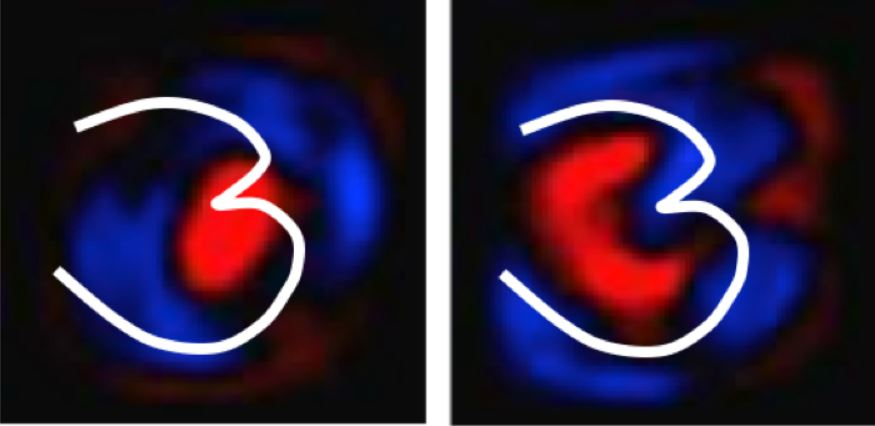

Tras el aprendizaje:

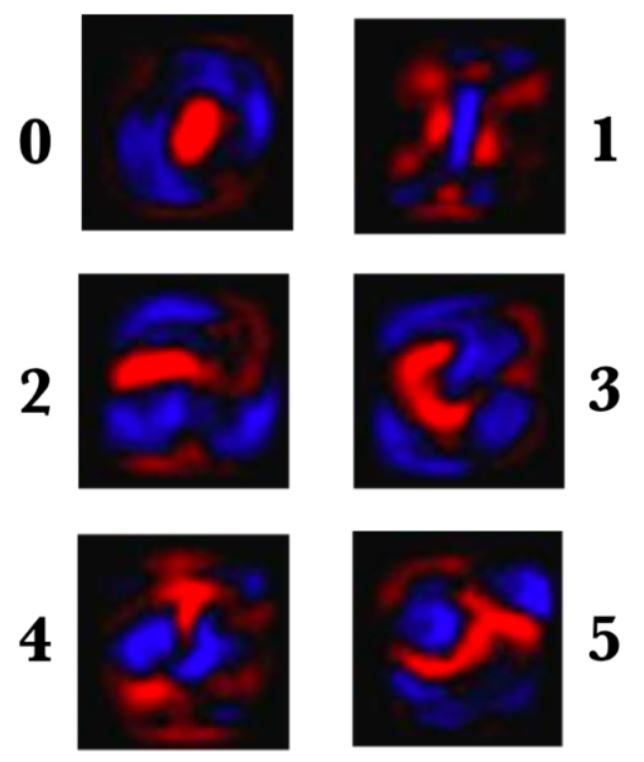

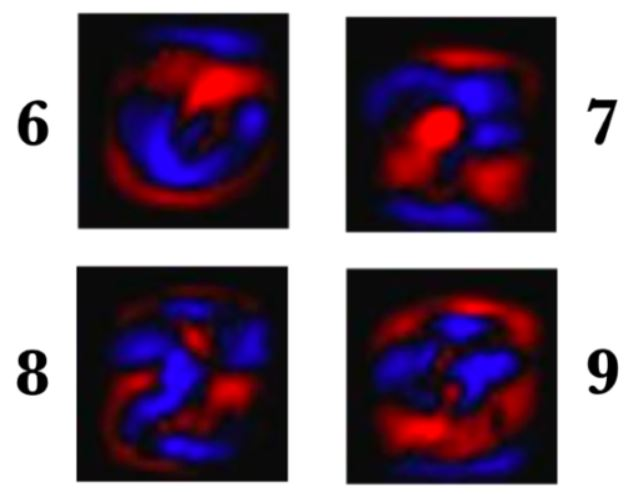

* **Softmax** usa el valor exponencial de las evidencias calculadas y luego las normaliza de modo que sumen uno, formando una distribución de probabilidad. La probabilidad de pertenencia a la clase i es:

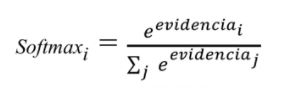

Para que nuestra red esté lista para la capacitación, debemos elegir tres cosas más, como parte del paso de "compilación":
- Una **función de pérdida**: es cómo la red podrá medir qué tan bien está haciendo el trabajo con los datos de entrenamiento y, por lo tanto, cómo será capaz de dirigirse en la dirección correcta. (Lo veremos en detalle más adelante)
- Un **optimizador**: este es el mecanismo a través del cual la red se actualizará en función de los datos que ve y su función de pérdida. (Lo veremos en detalle más adelante)
- **Métricas** para monitorizar durante el entrenamiento y las pruebas. Solo nos preocuparemos por la **precisión** `accuracy` (la fracción de las imágenes que fueron clasificado).

In [58]:
# 4.- HACEMOS EL PASO DE COMPILACIÓN CARGANDO EL
# OPTIMIZADOR, LA FUNCIÓN DE PÉRDIDA Y LAS MÉTRICAS
# Algoritmo optimizador rmsprop (Root Mean Square Propagation): Es un algoritmo
# similar a AdaGrad (Adaptive Gradient Algorithm) que mantiene un factor de
# entrenamiento diferente para cada dimensión, pero en este caso el escalado
# del factor de entrenamiento se realiza dividiéndolo por la media del declive
# exponencial del cuadrado de los gradientes.
# rmsprop
network.compile(optimizer='sgd', # Probar 'sgd' (Stocastic Gradient Descendent)
                loss='categorical_crossentropy',
                metrics=['accuracy'])
# 'categorical_crossentropy' es la función de pérdida que se utiliza como señal
# de retroalimentación para aprender los tensores de peso y que la fase de
# entrenamiento intentará minimizar
# La reducción de la pérdida se produce mediante el descenso de gradiente
# estocástico minilote, cuyas reglas exactas están gobernadas por el optimizador
# 'rmsprop'
# 'accuracy': Solo tendremos en cuenta la fracción de imágenes que son
# correctamente clasificadas

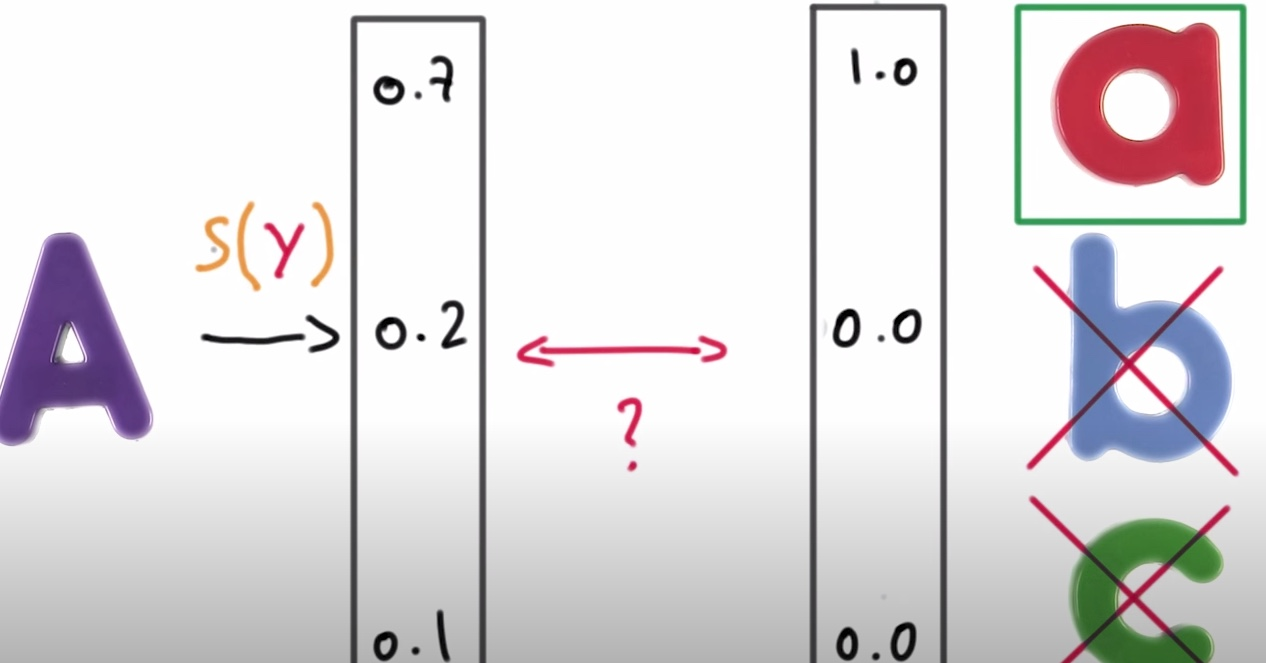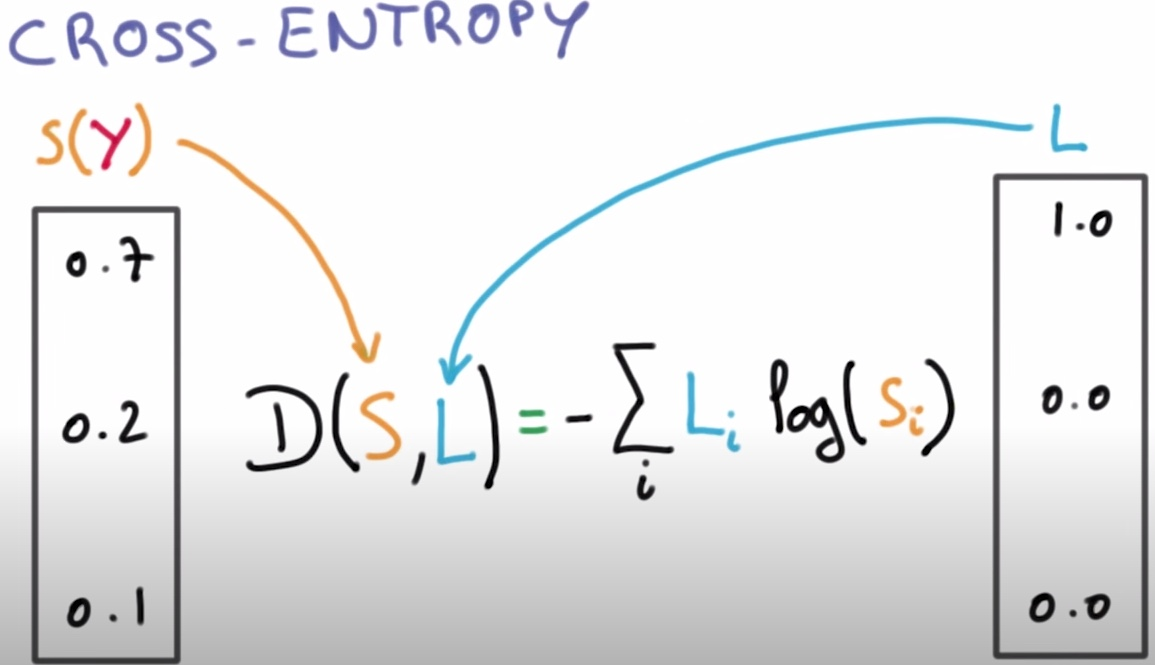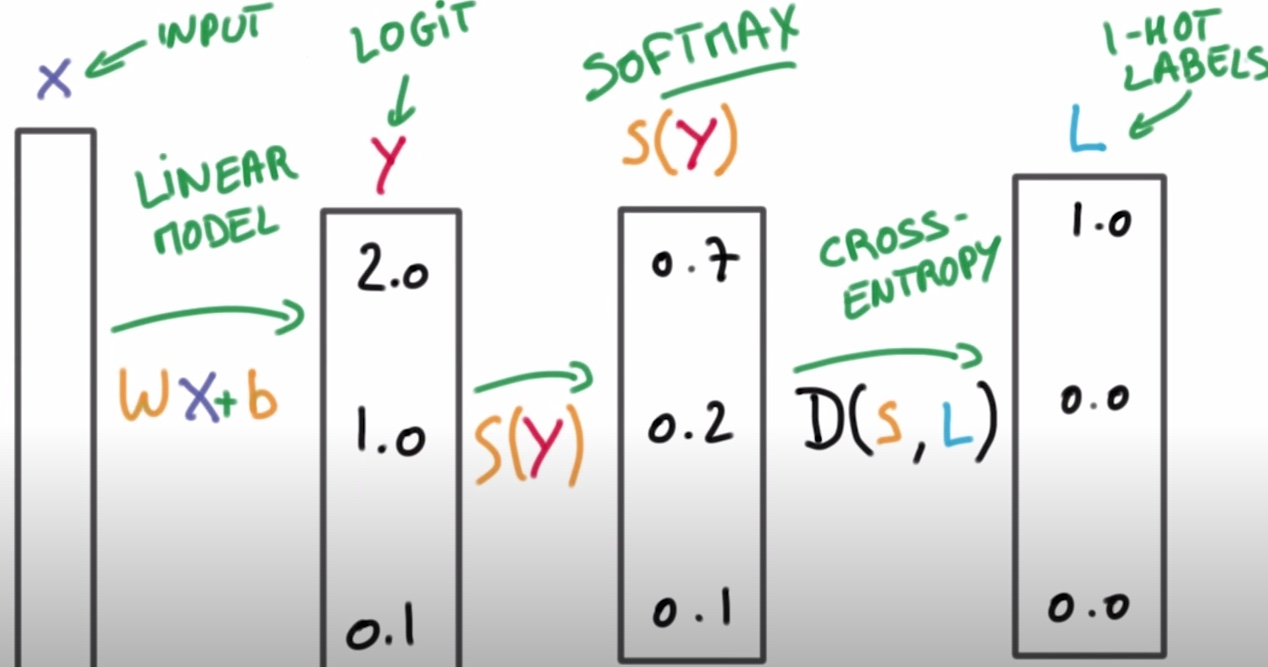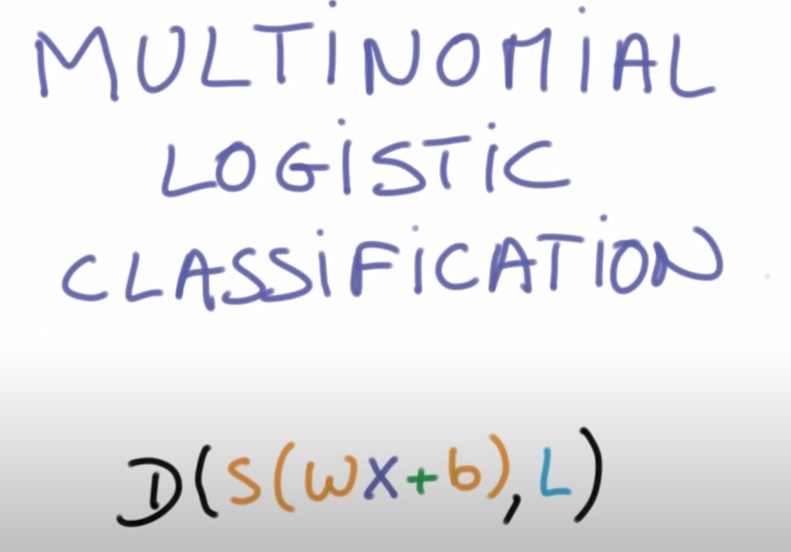

Antes del entrenamiento, **preprocesaremos nuestros datos** dándoles la forma que espera la red y escalando para que todos los valores estén en el intervalo `[0, 1]`. Antes, nuestras imágenes de entrenamiento, por ejemplo, se almacenaban en una matriz de forma `(60000, 28, 28)` de tipo `uint8` con valores en el intervalo `[0, 255]`. Lo transformamos en una matriz de forma `float32` con forma `(60000, 28 * 28)` con valores entre 0 y 1.

**NORMALIZACION**

La normalización que vamos a hacer se hacen **para facilitar que converja el proceso de entrenamiento** de la red. En general, para alimentar a redes neuronales, **no se usan datos con valores que sean mucho más grandes que los valores de los pesos de la red, o datos que sean heterogéneos de rango entre ellos**

In [59]:
# 5.- PREPARAMOS LOS DATOS DE IMAGEN CON ALGUNA TRANSFORMACIÓN. NORMALIZACION
# Los tensores transformados tienen la misma cantidad de datos total que el
# tensor inicial
train_images = train_images.reshape((60000, 28 * 28))
print(train_images)
print(len(train_images))
print(train_images.shape)
np.set_printoptions(precision=2, suppress=True, linewidth=145)
print(np.matrix(train_images[3000]))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
60000
(60000, 784)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0  25  91 174 254 254 255 254 156  27   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   9  84 212
  254 254

In [60]:
train_images = train_images.astype('float32') / 255
train_images, len(train_images), train_images.shape, train_images[3000]

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 60000,
 (60000, 784),
 array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0

In [61]:
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

También tenemos que **codificar categoricamente las etiquetas**. Usaremos el **one-hot encoding**, que en resumen, consiste en transformar las etiquetas en un vector de tantos ceros como el número de etiquetas distinta, y que contiene el valor de 1 en el índice que le corresponde al valor de la etiqueta:

In [62]:
# 6.- PREPARACIÓN LAS ETIQUETAS
# from keras import utils
# from keras.utils import to_categorical
from keras.utils.np_utils import to_categorical

train_labels = to_categorical(train_labels)  # to categroial me devuelve vectores de 3 posiciones --> me lo pasa a one hot.
test_labels = to_categorical(test_labels)
train_labels[30000] # Posición 0 a 9 donde solo la 3 tiene probabilidad 1. (antes salia un 3, ahora sal eun vector de 10 posiciones donde solo hay un 1 en la posicion del numero 3)
# El número 30000 de entrenamiento es un 3

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

Ya estamos listos para **entrenar a la red**, lo cual se hace en Keras a través de una llamada al métido `fit` de la red, que **ajusta el modelo a sus datos de entrenamiento**:

In [63]:
# 7.- ENTRENAMOS LA RED CON EL JUEGO DE DATOS DE ENTRENAMIENTO
# * epochs: Épocas: un límite arbitrario, definido como
# "una pasada sobre todo el conjunto de datos", que se utiliza para
# separar el entrenamiento en distintas fases, que es útil para el
# registro y la evaluación periódica. Como no hay initial_epoch, en
# este caso va hasta la época 5 desde 1.
# tamaño del lote
# * batch_size: Entero o NULO. Número de muestras por actualización de gradiente.
# Si no se especifica, batch_size se establecerá de forma predeterminada en 32.
network.fit(train_images, train_labels, epochs=5, batch_size=10)
# La red empezará a iterar por lo datos de entrenamiento en minilotes de 128
# muestras, 5 veces (cada iteración por los datos de entrenamiento recibe el
# nombre de "repetición"). En cada iteración, la red computará los gradientes de
# los pesos en relación con la pérdida en el lote y ajustará los pesos en
# consecuencia. Tras estas 5 repeticiones, la red habrá realizado 2.345 ajustes
# de gradiente (469 por repetición), la pérdida será lo bastante baja como para
# que la red sea capaz de clasificar números escritos a mano con gran exactitud.

Epoch 1/5
6000/6000 [==============================] - 37s 6ms/step - loss: 0.3999 - accuracy: 0.8927
Epoch 2/5
6000/6000 [==============================] - 38s 6ms/step - loss: 0.2240 - accuracy: 0.9370
Epoch 3/5
6000/6000 [==============================] - 34s 6ms/step - loss: 0.1730 - accuracy: 0.9512
Epoch 4/5
6000/6000 [==============================] - 35s 6ms/step - loss: 0.1413 - accuracy: 0.9609
Epoch 5/5
6000/6000 [==============================] - 35s 6ms/step - loss: 0.1193 - accuracy: 0.9667


* `fit()` devuelve un objeto `History` cuyo atributo `History.history()` contiene los valores de `loss` para los datos de entrenamiento y resto de métricas en sucesivas `epochs`. Esta información es fundamental para evitar **overfitting**

* Se muestran dos cantidades durante el entrenamiento: la **pérdida** (`loss`) de la red sobre los datos de entrenamiento y la **precisión** o exactitud (`acc`) de la red sobre los datos de entrenamiento.

* Alcanzamos rápidamente una precisión de 0,989 (es decir, 98,9%) en los datos de entrenamiento. Ahora verificamos que nuestro modelo también funcione bien en el conjunto de prueba:

In [64]:
# 8.- VERIFICAMOS NUESTRO MODELO YA ENTRENADO, CONTRA EL CONJUNTO DE PRUEBAS
test_loss, test_acc = network.evaluate(test_images, test_labels)
# HEMOS UTILIZADO MENOS DE 20 LÍNEAS DE CÓDIGO...

313/313 [==============================] - 2s 5ms/step - loss: 0.1139 - accuracy: 0.9671


In [65]:
print('test_loss:', test_loss)
print('test_acc:', test_acc)

test_loss: 0.11392553895711899
test_acc: 0.9671000242233276


La **precisión** de nuestro **conjunto de prueba** resulta ser del 98%, lo que
es **un poco más baja** que la **precisión** del conjunto de **entrenamiento**. Esta diferencia es un ejemplo de **sobreajuste**, el hecho de que **los modelos de aprendizaje automático tienden a funcionar peor con datos nuevos que con sus datos de entrenamiento**. El sobreajuste será algo que veamos en detalle más adelante.

* Para **evaluar** este  modelo solo **nos hemos centrado en su `accuracy`**, es decir la **proporción entre las predicciones correctas** que ha hecho el modelo y el **total de predicciones**.
* También hay que **tener en cuenta los tipos de predicciones correctas e incorrectas** que realiza el modelo **en cada una de sus categorías** => **Matriz de Confusión**
* Usamos esta **tabla** para **entender mejor cómo el modelo se comporta de bien**  y es muy útil para **mostrar de forma explícita cuando una clase es confundida con otra**. Una matriz de confusión para un clasificador binario sería:

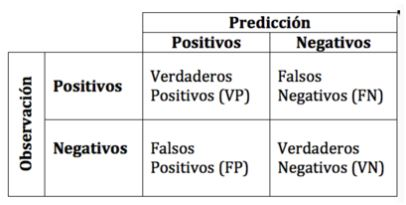

Accuracy o **PRECISIÓN = (VP + VN) / (VP + FP + VN + FN)**

* Imaginar un modelo que predice si una seta es venenosa....No admito FN

RECALL mide la capacidad del modelo para identificar correctamente todos los ejemplos positivos en un conjunto de datos. Se utiliza en problemas en los que es importante minimizar los falsos negativos (FN), es decir, los casos en los que el modelo falla en identificar ejemplos positivos.

**RECALL = VP / (VP + FN)**

Veamos la matriz de confusión de nuestro ejemplo:

In [66]:
# Look at confusion matrix
# Note, this code is taken straight from the SKLEARN website, an nice way of
# viewing confusion matrix.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

313/313 [==============================] - 2s 5ms/step
=VALORES QUE PREDICE EL MODELO ENTRENADO CON LAS IMAGENES DE TEST======
=RECORDAR QUE LA PRIMERA IMAGEN DE TEST ERA UN 7=======================
[0.56 0.03 0.93 0.98 0.01 0.41 0.   1.   0.31 0.83]
=CONVERSION DE PREDICCIONES EN CLASES DESDE VECTORES ONE-HOT ENCODING==
[7 2 1 ... 4 5 6]
=CONVERSION DE VALORES REALES EN CLASES DESDE VECTORES ONE-HOT ENCODING
[7 2 1 ... 4 5 6]
=MATRIZ DE CONFUSION CON VALORES REALES FRENTE A LOS PREDICHOS=========
[[ 966    0    1    2    0    4    4    2    1    0]
 [   0 1123    2    1    0    1    3    1    4    0]
 [   6    4  994    5    4    1    3    9    6    0]
 [   0    0    2  985    0    6    0    9    6    2]
 [   1    0    3    1  949    0    8    2    2   16]
 [   7    1    0   13    2  849    9    1    6    4]
 [   5    3    1    0    7    7  931    0    4    0]
 [   0    9   10    4    2    0    0  993    1    9]
 [   3    1    2   11    6    5    4    8  931    3]
 [   6    6    1   1

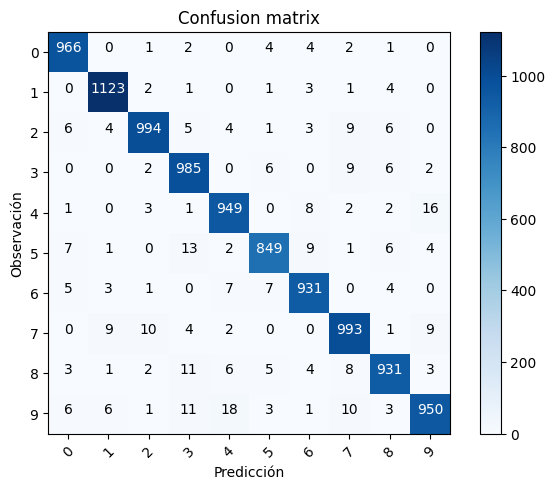

In [67]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np

# Predicción de valores desde el dataset de validación
Y_pred = network.predict(test_images)
print("=VALORES QUE PREDICE EL MODELO ENTRENADO CON LAS IMAGENES DE TEST======")
print("=RECORDAR QUE LA PRIMERA IMAGEN DE TEST ERA UN 7=======================")
print(Y_pred[0])
print("=======================================================================")
# Convertir en predicciones de clases desde los vectores one-hot encoding
Y_pred_classes = np.argmax(Y_pred, axis = 1)
print("=CONVERSION DE PREDICCIONES EN CLASES DESDE VECTORES ONE-HOT ENCODING==")
print(Y_pred_classes)
print("=======================================================================")
# Convertir en clases de observación desde los vectores one-hot encoding
Y_true = np.argmax(test_labels, axis = 1)
print("=CONVERSION DE VALORES REALES EN CLASES DESDE VECTORES ONE-HOT ENCODING")
print(Y_true)
print("=======================================================================")
# Computar la matriz de confusión
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
print("=MATRIZ DE CONFUSION CON VALORES REALES FRENTE A LOS PREDICHOS=========")
print(confusion_mtx)
print("=======================================================================")
# Dibujar la matriz de confusión
print("=PINTAMOS LA MATRIZ DE CONFUSION=======================================")
plot_confusion_matrix(confusion_mtx, classes = range(10))

* https://en.wikipedia.org/wiki/Confusion_matrix
* https://scikit-learn.org/stable

**GENERACIÓN DE PREDICCIONES**

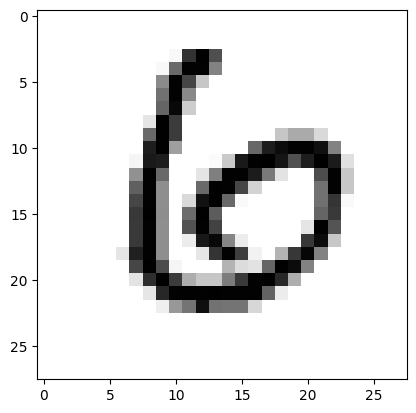

In [68]:
# Veamos el elemento 12 de test y pintémoslo con matplotlib
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
import matplotlib.pyplot as plt
digit = test_images[11]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [69]:
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

from keras.utils.np_utils import to_categorical

print("=VEMOS LAS ETIQUETAS DE TEST ORIGINALES================================")
print(test_labels)
print("=======================================================================")
test_labels = to_categorical(test_labels)
print("=VEMOS LAS ETIQUETAS DE TEST AL PASARLAS POR to_categorical============")
print(test_labels)
print("=======================================================================")

# Hacemos las predicciones con las imágenes de Test
predictions = network.predict(test_images)

print("=VEMOS LA PREDICCIÓN DEL ELEMENTO 12 (QUE DEBERÍA SER UN 6)============")
print(predictions[11])
print("=======================================================================")
print("=VEMOS LA PREDICCIÓN DEL ELEMENTO 12 (QUE DEBERÍA SER UN 6)============")
print(np.argmax(predictions[11]))
print("=======================================================================")
print("=LA SUMA DE TODAS LAS PREDICCIONES PARA EL ELEMENTO 12 DEBERÍA SER 1===")
print(np.sum(predictions[11]))
print("=======================================================================")
print("=PINTAMOS TODAS LAS PREDICCIONES=======================================")
print(predictions)

=VEMOS LAS ETIQUETAS DE TEST ORIGINALES================================
[7 2 1 ... 4 5 6]
=VEMOS LAS ETIQUETAS DE TEST AL PASARLAS POR to_categorical============
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
313/313 [==============================] - 1s 3ms/step
=VEMOS LA PREDICCIÓN DEL ELEMENTO 12 (QUE DEBERÍA SER UN 6)============
[0.47 0.34 0.5  0.24 0.4  0.61 1.   0.01 0.89 0.08]
=VEMOS LA PREDICCIÓN DEL ELEMENTO 12 (QUE DEBERÍA SER UN 6)============
6
=LA SUMA DE TODAS LAS PREDICCIONES PARA EL ELEMENTO 12 DEBERÍA SER 1===
4.543693
=PINTAMOS TODAS LAS PREDICCIONES=======================================
[[0.56 0.03 0.93 ... 1.   0.31 0.83]
 [0.74 0.95 1.   ... 0.   0.94 0.  ]
 [0.03 1.   0.73 ... 0.82 0.66 0.17]
 ...
 [0.   0.01 0.   ... 0.83 0.98 0.99]
 [0.29 0.2  0.02 ... 0.02 0.99 0.06]
 [0.75 0.02 0.95 ... 0.   0.13 0.03]]


## Distribución de Probalidades

In [70]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label.all() == true_label.all():
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#00FF00")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('black')

313/313 [==============================] - 1s 3ms/step


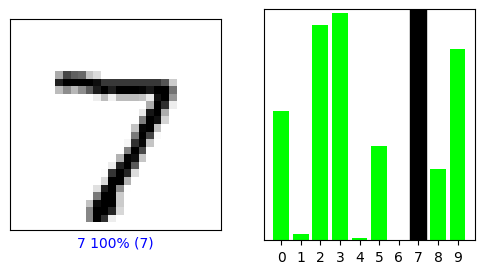

<Figure size 640x480 with 0 Axes>

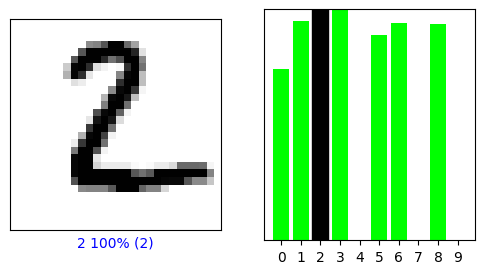

<Figure size 640x480 with 0 Axes>

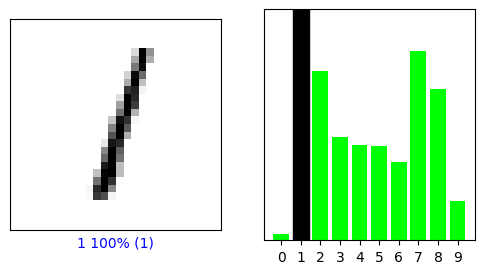

<Figure size 640x480 with 0 Axes>

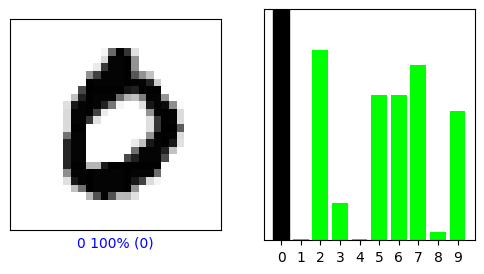

<Figure size 640x480 with 0 Axes>

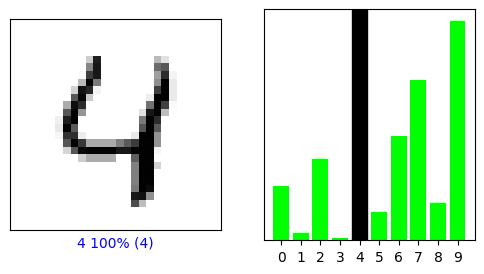

<Figure size 640x480 with 0 Axes>

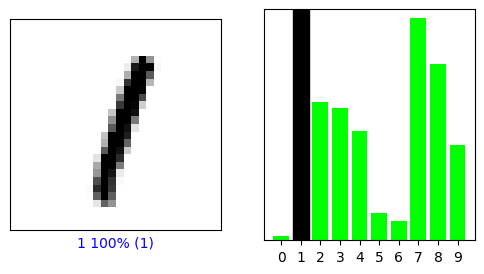

<Figure size 640x480 with 0 Axes>

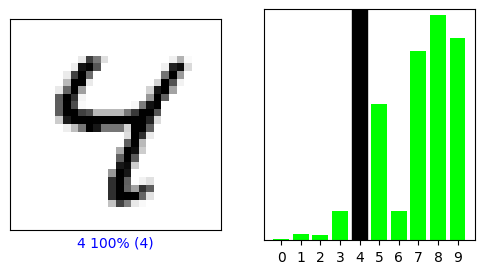

<Figure size 640x480 with 0 Axes>

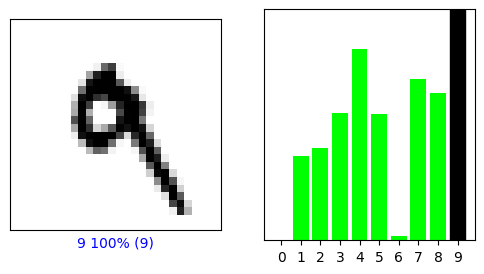

<Figure size 640x480 with 0 Axes>

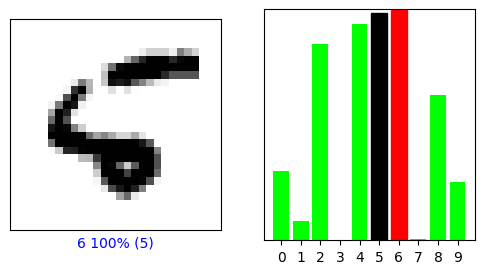

<Figure size 640x480 with 0 Axes>

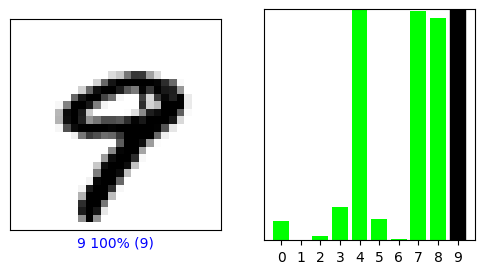

<Figure size 640x480 with 0 Axes>

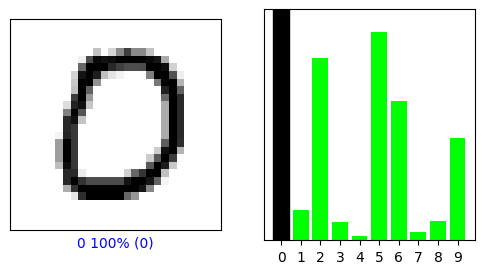

<Figure size 640x480 with 0 Axes>

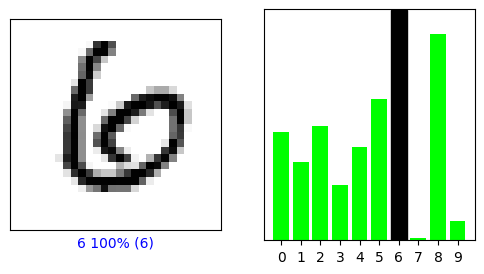

<Figure size 640x480 with 0 Axes>

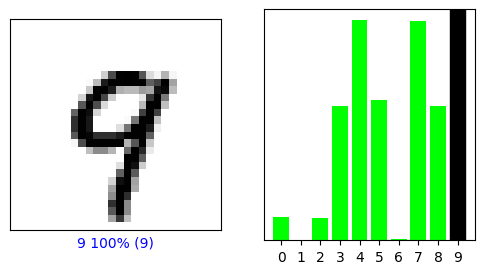

<Figure size 640x480 with 0 Axes>

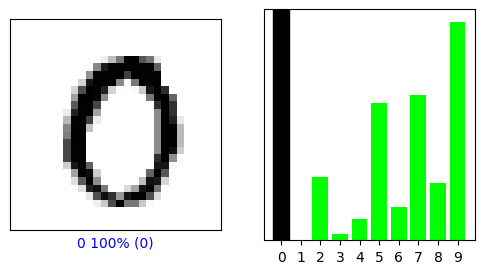

<Figure size 640x480 with 0 Axes>

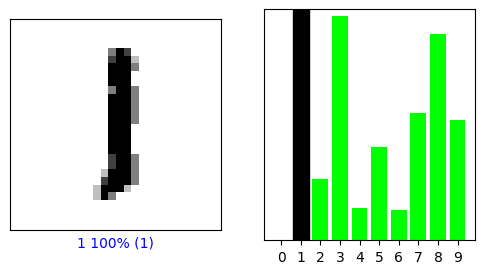

<Figure size 640x480 with 0 Axes>

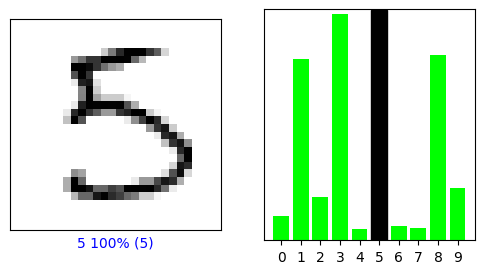

<Figure size 640x480 with 0 Axes>

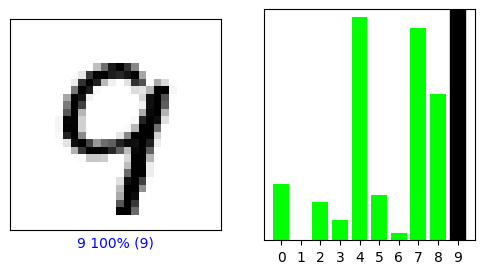

<Figure size 640x480 with 0 Axes>

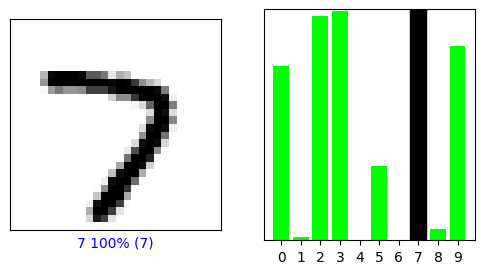

<Figure size 640x480 with 0 Axes>

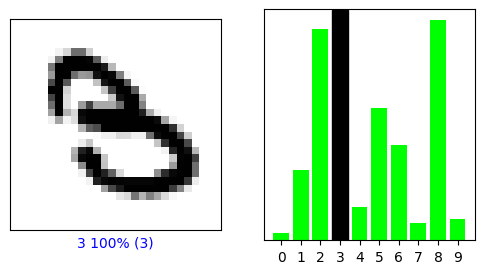

<Figure size 640x480 with 0 Axes>

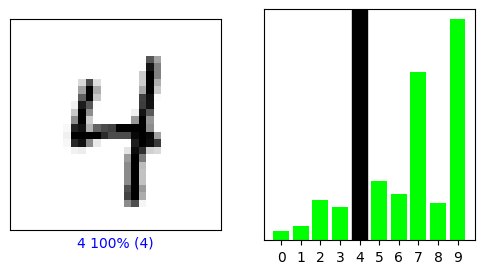

<Figure size 640x480 with 0 Axes>

In [71]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

predictions = network.predict(test_images)

for i in range(20):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions[i], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(i, predictions[i],  test_labels)
  plt.show()
  plt.clf()

## Un repaso a softmax

In [72]:
try:
  # %tensorflow_version solo existe en Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.keras.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))
print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.12.0
GPU Available: []
2.12.0


In [73]:
mnist = tf.keras.datasets.mnist
# A partir de ahora, x es la matriz de la imagen e y es la etiqueta
(x_train, y_train), (x_test, y_test) = mnist.load_data()

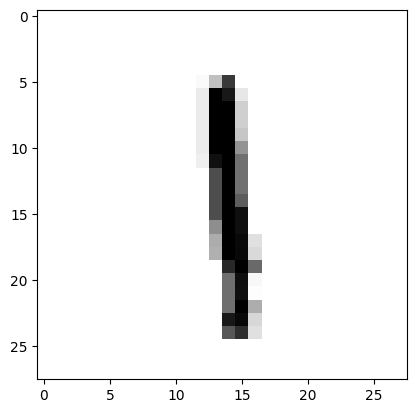

In [74]:
plt.imshow(x_train[8], cmap=plt.cm.binary)

In [75]:
print(y_train[8])

1


In [76]:
np.set_printoptions(precision=2, suppress=True, linewidth=120)
print(np.matrix(x_train[8]))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   5  63 197   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  20 254 230  24   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  20 254 254  48   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  20 254 255  48   0   0   0   

In [77]:
x_train = x_train.reshape((60000, 784))
x_test = x_test.reshape((10000, 784))
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(10, activation='softmax', name="FC1", input_shape=(784,))
])
model.summary()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=1)

model.evaluate(x_test,  y_test, verbose=2)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 FC1 (Dense)                 (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4701 - accuracy: 0.8777
313/313 - 1s - loss: 0.3066 - accuracy: 0.9158 - 622ms/epoch - 2ms/step


[0.30659881234169006, 0.9157999753952026]

[array([[-0.05, -0.06, -0.06, ...,  0.04, -0.08,  0.05],
       [-0.  ,  0.01,  0.03, ..., -0.03,  0.02, -0.07],
       [ 0.03, -0.02, -0.05, ...,  0.04,  0.03,  0.05],
       ...,
       [ 0.02,  0.08, -0.08, ..., -0.04, -0.08, -0.03],
       [-0.01,  0.09, -0.08, ..., -0.05, -0.04,  0.03],
       [-0.08, -0.08, -0.03, ..., -0.08,  0.08,  0.01]], dtype=float32), array([-0.15,  0.25, -0.03, -0.1 ,  0.07,  0.22, -0.02,  0.16, -0.34, -0.05], dtype=float32)]


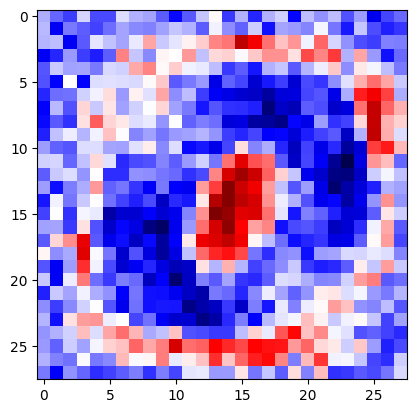

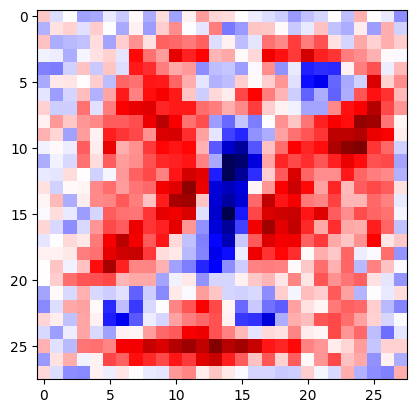

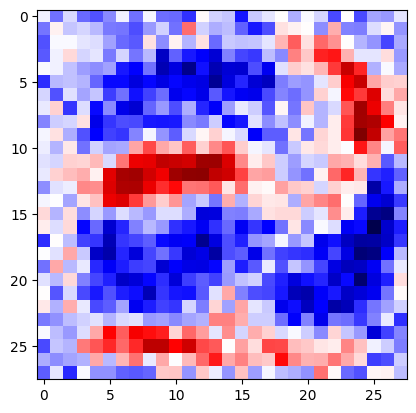

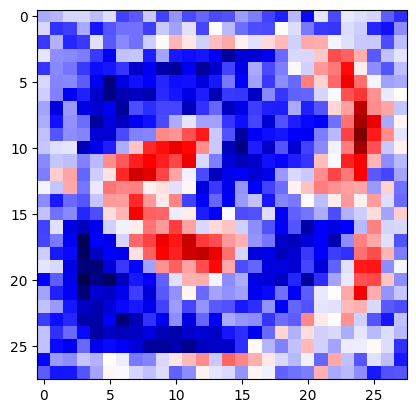

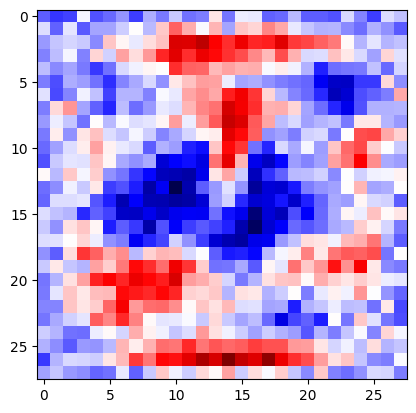

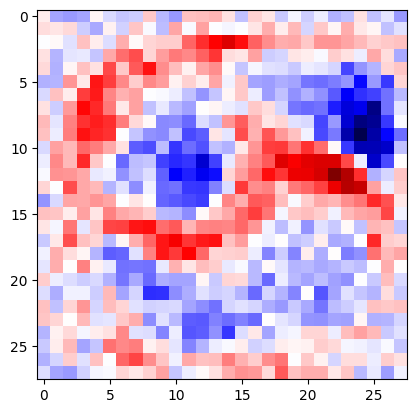

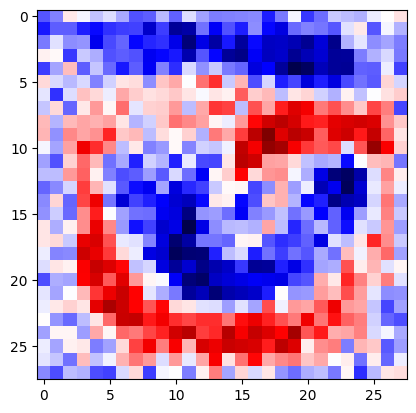

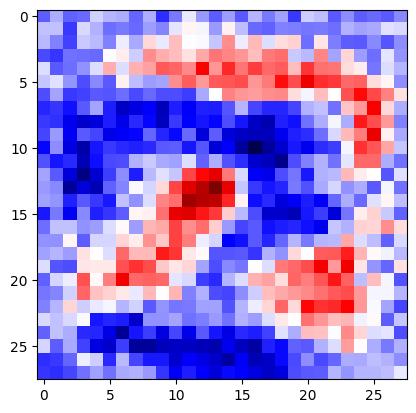

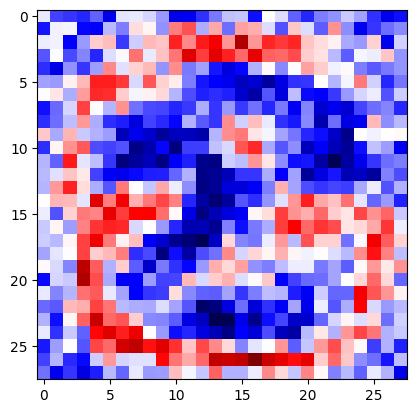

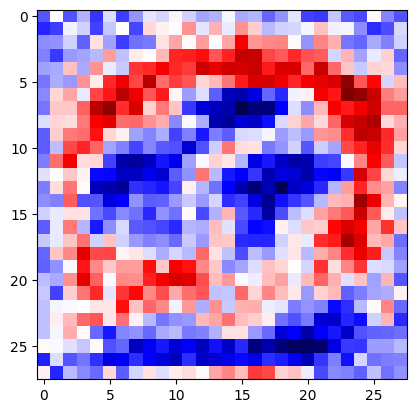

In [78]:
w = model.get_weights()
print(w)
w = np.asarray(w[0])  # mapa de evidencias sacados de los pesos
for i in range(10):
  plt.figure()
  plt.imshow(w[:,i].reshape([28,28]), cmap=plt.get_cmap('seismic_r'))

In [79]:
np.set_printoptions(precision=0, suppress = True, linewidth=220)
print(np.matrix (255*(w[:,0].reshape([28,28]))))

[[ -13.   -0.    7.  -20.    5.    5.  -22.  -14.  -12.    2.   17.    2.  -17.  -29.    8.  -14.   12.  -14.  -20.   18.  -16.   -8.  -16.    4.  -10.   22.    6.   -1.]
 [ -16.   21.   -4.    2.    7.   -1.  -12.   -6.   -5.  -11.  -17.  -14.    1.  -26.   -7.    1.  -19.   15.  -12.  -10.   -6.  -27.   -3.   14.  -18.    4.   13.    9.]
 [ -15.  -16.   22.    2.  -23.  -17.  -12.  -24.  -44.  -18.  -23.  -31.  -38.  -50.  -53.  -99.  -78.  -54.  -39.  -48.  -26.  -56.  -21.   -8.    4.    8.   -5.   -4.]
 [  22.   12.   -9.    7.   13.    2.  -51.  -18.   -6.  -30.  -29.  -47.  -16.  -35.  -37.  -27.  -38.  -48.  -48.  -34.  -62.  -50.  -65.  -14.  -45.   -9.   16.   -1.]
 [   3.  -18.  -11.  -11.   -3.  -21.  -20.  -44.  -50.  -29.  -37.  -25.  -24.  -16.    8.    2.   14.  -14.  -18.    2.  -15.  -25.  -38.   -7.  -32.  -26.  -16.   -3.]
 [   4.   19.  -29.   18.  -22.  -22.  -22.  -21.  -29.  -38.    2.   -4.   -9.   25.    1.    6.   31.   14.    8.   30.    5.    9.   -7.  -23.

---

# RETOMAMOS EL MODELO ORIGINAL PARA PINTAR LOS PESOS APRENDIDOS

In [80]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
print(tf.keras.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))
print(tf.__version__)
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Dense(512, name='Capa_Entrada_Relu', activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, name='Capa_Salida_Softmax', activation='softmax'))
network.summary()
print("=======================================================================")
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255
from keras.utils.np_utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
network.fit(train_images, train_labels, epochs=5, batch_size=128)
print("=======================================================================")
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_loss:', test_loss)
print('test_acc:', test_acc)
print("=======================================================================")
Y_pred = network.predict(test_images)
print('Predicción para la primera imagen de test:', Y_pred[0])
print("=======================================================================")
Y_pred_classes = np.argmax(Y_pred, axis = 1)
print("Valor real para la primera imagen de test:", Y_pred_classes[0])

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.12.0
GPU Available: []
2.12.0
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Capa_Entrada_Relu (Dense)   (None, 512)               401920    
                                                                 
 Capa_Salida_Softmax (Dense)  (None, 10)               5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
469/469 [==============================] - 6s 12ms/step - loss: 0.2609 - accuracy: 0.9247
Epoch 2/5
469/469 [==============================] - 9s 19ms/step - loss: 0.1066 - accuracy: 0.9687
Epoch 3/5
469/469 [==============================] - 6s 12ms/step - loss: 0.0706 - accuracy: 0.9786
Epoch 4/5
469/469 [======================

In [81]:
import numpy as np
import matplotlib.pyplot as plt
w = network.get_weights()
# Capa 0 => Pesos
first_layer_weights = network.layers[0].get_weights()[0]
print('Forma de los Pesos de la capa 0: ',first_layer_weights.shape)
# Capa 0 => Umbrales
first_layer_biases  = network.layers[0].get_weights()[1]
print('Forma de los Umbrales de la capa 0: ',first_layer_biases.shape)
# Capa 1 => Pesos
second_layer_weights = network.layers[1].get_weights()[0]
print('Forma de los Pesos de la capa 1: ',second_layer_weights.shape)
# Capa 1 => Umbrales
second_layer_biases  = network.layers[1].get_weights()[1]
print('Forma de los Umbrales de la capa 1: ',second_layer_biases.shape)

Forma de los Pesos de la capa 0:  (784, 512)
Forma de los Umbrales de la capa 0:  (512,)
Forma de los Pesos de la capa 1:  (512, 10)
Forma de los Umbrales de la capa 1:  (10,)


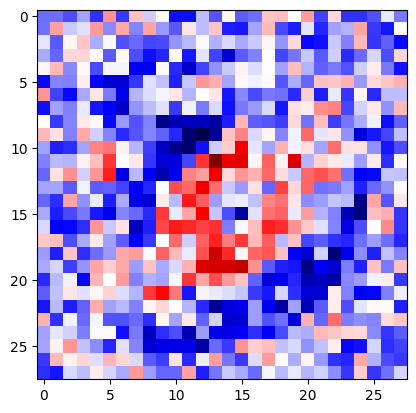

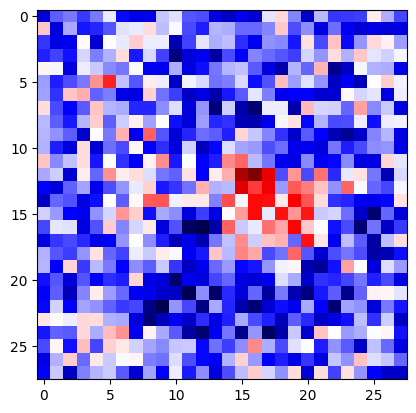

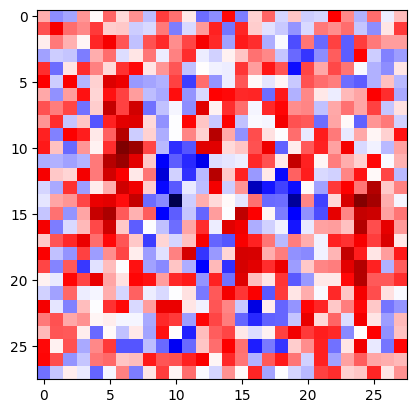

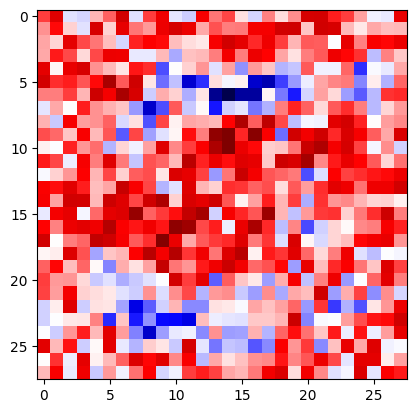

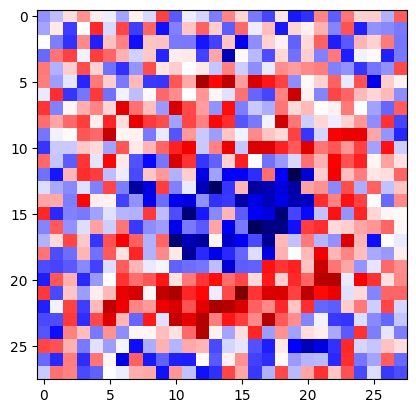

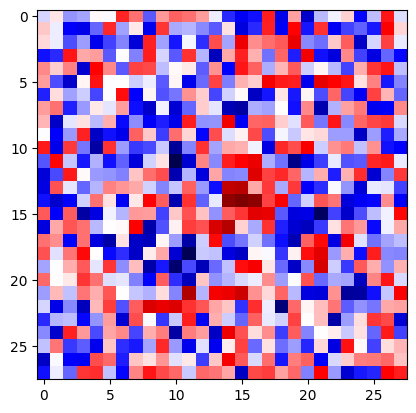

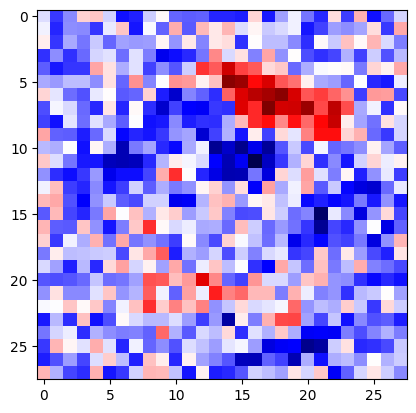

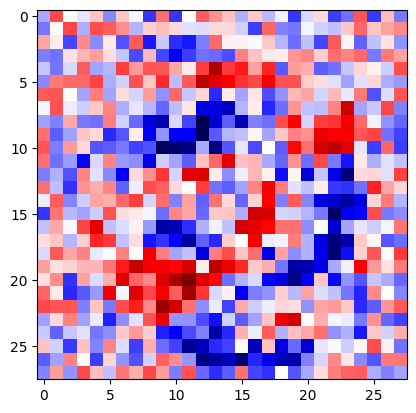

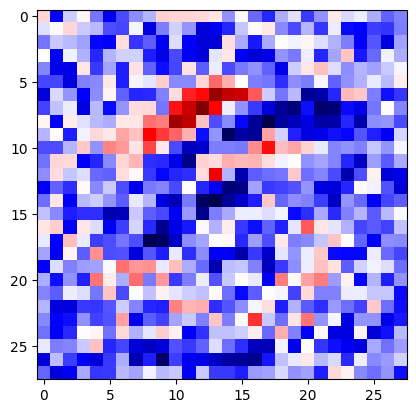

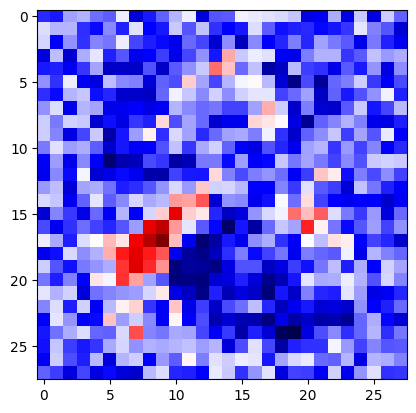

In [82]:
w = np.asarray(first_layer_weights)
for i in range(10):
  plt.figure()
  plt.imshow(w[:,i].reshape([28,28]), cmap=plt.get_cmap('seismic_r'))